In [14]:
# Load the .npy file
import os
import numpy as np

og = []
for i in range(10):
    if i>0:
        data = np.load(f'C:/Users/xoni/Documents/1_uni/1_insterships/UR-DMU/test/Abuse028_x264__{i}.npy')  # Replace with the actual file path
    else:
        data = np.load(f'C:/Users/xoni/Documents/1_uni/1_insterships/UR-DMU/test/Abuse028_x264.npy')

    #añadir a siguiente vector
    og.append(data)
    # print(len(og))
   
og = np.stack(og, axis=0)
og_mean = np.mean(og, axis=0)


# print("og: ")
# print(og.shape)
# print(og[0])

# print("la media del og:")
# print(og_mean.shape)
# print(og_mean[0])


# rgb = np.load('C:/Users/xoni/Documents/1_uni/1_insterships/UR-DMU/test/rgb_test/Abuse028_x264.npy')  # Replace with the actual file path
# print("rgb:")
# print(rgb.shape)
# print(rgb[0])

print("mio:")
mio = np.load('UCF_ten/Abuse028_x264_i3d.npy')  # Replace with the actual file path
print(mio.shape)
print(mio[0])

print("media: ")
media = mio.mean(axis=0)
print(media.shape)
print(media[0])

print("mio diezmado:")
mio_quince = np.load('UCF_ten/quince/Abuse028_x264_i3d.npy')  # Replace with the actual file path
print(mio_quince.shape)
print(mio_quince[0])

print("media: ")
media = mio_quince.mean(axis=0)
print(media.shape)
print(media[0])

mio:
(10, 89, 1024)
[[0.26942024 0.1617896  0.10704    ... 0.3238298  0.09678405 0.36583567]
 [0.19056694 0.14125705 0.11378231 ... 0.231105   0.06342842 0.4446679 ]
 [0.23900488 0.18802994 0.12608467 ... 0.32964697 0.01131064 0.39195547]
 ...
 [0.20775764 0.13021219 0.10157082 ... 0.473874   0.17021932 0.563565  ]
 [0.20448238 0.12456121 0.09880609 ... 0.56455463 0.21634176 0.58929056]
 [0.21014206 0.13138811 0.10433579 ... 0.48917645 0.13987175 0.54219514]]
media: 
(89, 1024)
[0.2601171  0.1554194  0.15930425 ... 0.2729995  0.10002609 0.45923433]
mio diezmado:
(10, 6, 1024)
[[0.22218946 0.1695601  0.24083488 ... 0.4215627  0.72062665 0.18558654]
 [0.2024489  0.13089372 0.1452418  ... 0.946436   0.62175435 0.72135806]
 [0.09772517 0.16424681 0.05562461 ... 0.4236111  0.27299085 0.4410089 ]
 [0.16566488 0.19124958 0.0924395  ... 0.39812228 0.3916979  0.60310704]
 [0.12025465 0.10561669 0.06484278 ... 0.28350127 0.15138173 0.39934996]
 [0.20577031 0.12278439 0.09934388 ... 0.5158026  0.

Split 10 crop features to one crop features

In [21]:
from tqdm import tqdm


def ten2one(source,dst):
    features=os.listdir(source)
    for feature in tqdm(features):
        data=np.load(os.path.join(source,feature))
        for i in range(10):
            np.save("{}/{}_{}.npy".format(dst,feature.split(".npy")[0],i),data[i])

ten2one("UCF_ten/quince","UCF_one")

100%|██████████| 290/290 [00:02<00:00, 137.82it/s]


In [20]:
# Load the .npy file
import os
import numpy as np

mio = []

for i in range(10):
    data = np.load(f'UCF_ten\quince\one\Abuse028_x264_i3d_{i}.npy')  # Replace with the actual file path
    print(data.shape)
    print(data)
    mio.append(data)

mio = np.stack(mio, axis=0)

print("mio:")
print(mio.shape)
print(mio[0])
mio_mean = np.mean(mio, axis=0)
print("media: ")
print(mio_mean.shape)
print(mio_mean[0])


(6, 1024)
[[0.22218946 0.1695601  0.24083488 ... 0.4215627  0.72062665 0.18558654]
 [0.2024489  0.13089372 0.1452418  ... 0.946436   0.62175435 0.72135806]
 [0.09772517 0.16424681 0.05562461 ... 0.4236111  0.27299085 0.4410089 ]
 [0.16566488 0.19124958 0.0924395  ... 0.39812228 0.3916979  0.60310704]
 [0.12025465 0.10561669 0.06484278 ... 0.28350127 0.15138173 0.39934996]
 [0.20577031 0.12278439 0.09934388 ... 0.5158026  0.15366879 0.5244505 ]]
(6, 1024)
[[0.3444013  0.17722636 0.1549262  ... 0.4214291  0.43215612 0.24614155]
 [0.39736277 0.12529473 0.1640603  ... 0.6541954  0.26277718 0.59761405]
 [0.25537214 0.22592564 0.12987718 ... 0.58274174 0.31263432 0.34103203]
 [0.36957783 0.17583618 0.12610269 ... 0.72417533 0.5719527  0.57992643]
 [0.22640051 0.10862626 0.10386681 ... 0.6690455  0.2770978  0.2162621 ]
 [0.33372957 0.14377016 0.13744925 ... 0.71089876 0.20008571 0.32449356]]
(6, 1024)
[[0.29375127 0.15862864 0.21942303 ... 0.3051883  0.48794964 0.21026671]
 [0.31651068 0.2074

In [11]:
import os

def archivos_unicos(lista, carpeta):
    # Leer los nombres de archivos desde la lista
    with open(lista, 'r') as f:
        archivos_lista = set([line.strip().split('_x264')[0] for line in f])
        archivos_lista = set([i.split('/')[1] for i in archivos_lista])
        print(f"Archivos en la lista: {archivos_lista}")

    # Obtener los nombres de archivos en la carpeta
    archivos_carpeta = set(os.listdir(carpeta))
    archivos_carpeta = set([i.split('_x264')[0] for i in archivos_carpeta])
    print(f"Archivos en la carpeta: {archivos_carpeta}")

    # Calcular la diferencia entre la lista y la carpeta
    unicos_lista = archivos_lista - archivos_carpeta
    unicos_carpeta = archivos_carpeta - archivos_lista

    print(f"Total de archivos únicos en {lista} que no están en la carpeta: {len(unicos_lista)}")
    print(f"Total de archivos únicos en la carpeta que no están en {lista}: {len(unicos_carpeta)}")

    return list(unicos_lista), list(unicos_carpeta)

# Ejemplo de uso
lista = 'C:/Users/xoni/Documents/1_uni/1_insterships/UR-DMU/list/UCF_Test.list'  # Reemplazar con la ruta del archivo de lista
carpeta = 'C:/Users/xoni/Documents/1_uni/1_insterships/UR-DMU/UCF_Crime_Frames/2_oct'  # Reemplazar con la ruta de la carpeta

archivos_faltantes_lista, archivos_faltantes_carpeta = archivos_unicos(lista, carpeta)

print("\nArchivos en la lista que no están en la carpeta:")
for archivo in archivos_faltantes_lista:
    print(archivo)

print("\nArchivos en la carpeta que no están en la lista:")
for archivo in archivos_faltantes_carpeta:
    print(archivo)


Archivos en la lista: {'Vandalism017', 'Arson035', 'Normal_Videos_439', 'Shoplifting001', 'Burglary024', 'Robbery050', 'Burglary035', 'Normal_Videos_891', 'Normal_Videos_597', 'Fighting047', 'Normal_Videos_352', 'Normal_Videos_717', 'Fighting018', 'Normal_Videos_898', 'Normal_Videos_289', 'Normal_Videos_880', 'Normal_Videos_932', 'RoadAccidents124', 'Vandalism036', 'Normal_Videos_041', 'Normal_Videos_910', 'Normal_Videos_886', 'Arrest001', 'Shooting046', 'Shooting026', 'Normal_Videos_621', 'Normal_Videos_758', 'RoadAccidents002', 'Burglary092', 'Normal_Videos_224', 'Arrest039', 'Arson016', 'Normal_Videos_939', 'Normal_Videos_606', 'Shoplifting017', 'Normal_Videos_175', 'Normal_Videos_868', 'Normal_Videos_059', 'Shoplifting010', 'Abuse028', 'Normal_Videos_940', 'Explosion017', 'Normal_Videos_051', 'Normal_Videos_924', 'Normal_Videos_656', 'Shoplifting049', 'Burglary076', 'Normal_Videos_870', 'Shoplifting028', 'Normal_Videos_876', 'Arson011', 'Normal_Videos_907', 'Normal_Videos_897', 'No

In [23]:
import os

def save_filenames_to_txt(source_folder, output_txt):
    # Obtener la lista de archivos en la carpeta
    files = os.listdir(source_folder)
    
    # Abrir el archivo .txt para escribir los nombres de los archivos
    with open(output_txt, 'w') as f:
        for file in files:
            # Solo considerar archivos con extensión .npy
            if file.endswith('.npy'):
                # Obtener la ruta completa del archivo
                full_path = os.path.join(source_folder, file)
                # Escribir la ruta completa en el archivo .txt
                f.write(full_path + '\n')

# Uso de la función
save_filenames_to_txt("UCF_one", "output.txt")



Comaparar dos archivos .pth

In [3]:
import torch

# Cargar los archivos .pth
ruta_modelo1 = 'model_rgb.pth'
ruta_modelo2 = 'model_rgb2.pth'

state_dict1 = torch.load(ruta_modelo1, map_location='cpu')
state_dict2 = torch.load(ruta_modelo2, map_location='cpu')

# Verificar que tienen las mismas claves
claves1 = set(state_dict1.keys())
claves2 = set(state_dict2.keys())

if claves1 != claves2:
    print("Los modelos tienen diferentes conjuntos de parámetros.")
else:
    print("Ambos modelos tienen los mismos conjuntos de parámetros.")

    # Comparar cada parámetro
    diferencias = False
    for clave in claves1:
        tensor1 = state_dict1[clave]
        tensor2 = state_dict2[clave]
        if not torch.equal(tensor1, tensor2):
            print(f"Diferencia encontrada en el parámetro: {clave}")
            diferencias = True

    if not diferencias:
        print("Ambos modelos son idénticos en sus pesos.")
    else:
        print("Se encontraron diferencias en los pesos de los modelos.")



Ambos modelos tienen los mismos conjuntos de parámetros.
Ambos modelos son idénticos en sus pesos.


C:\Users\xoni\AppData\Local\Temp\ipykernel_5584\2668930768.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict1 = torch.load(ruta_modelo1, map_location='cpu')
C:\

Comparar features originales de rgb y flow combinadas, con las mias rgb descargadas y flow generadas + combinadas

In [6]:
# Load the .npy file
import os
import numpy as np


# abuse = np.load('C:/Users/xoni/Downloads/i3d/rgb/Abuse028_x264/feature.npy') 
# print("abuse:")
# print(abuse.shape)
# print(abuse)


print("1fps:")
print(np.load('UCF_ten/1fps/test/Abuse028_x264_i3d.npy').shape)
print("2fps:")
print(np.load('UCF_ten/quince/test/Abuse028_x264_i3d.npy').shape)
print("3fps:")
print(np.load('UCF_ten/3fps/test/Abuse028_x264_i3d.npy').shape)
print("6fps:")
print(np.load('UCF_ten/6fps/test/Abuse028_x264_i3d.npy').shape)
print("10fps:")
print(np.load('UCF_ten/10fps/test/Abuse028_x264_i3d.npy').shape)
print("15fps:")
print(np.load('UCF_ten/15fps/test/Abuse028_x264_i3d.npy').shape)
print("30fps:")
print(np.load('UCF_ten/30fps/test/Abuse028_x264_i3d.npy').shape)





1fps:
(10, 3, 1024)
2fps:
(10, 6, 1024)
3fps:
(10, 9, 1024)
6fps:
(10, 18, 1024)
10fps:
(10, 30, 1024)
15fps:
(10, 45, 1024)
30fps:
(10, 89, 1024)


guardar archivos npy fuera de la carpeta

In [15]:
import os
import shutil

# Directorio de entrada donde están las subcarpetas con los archivos .npy
input_dir = r"UCF_combine_one/combine"
# Directorio de salida donde se guardarán los archivos .npy renombrados
output_dir = r"UCF_combine_one"

# Recorre todas las carpetas dentro del directorio de entrada
for folder in os.listdir(input_dir):
    folder_path = os.path.join(input_dir, folder)
    
    # Verifica que sea un directorio
    if os.path.isdir(folder_path):
        # Busca el archivo .npy dentro de la subcarpeta
        for file in os.listdir(folder_path):
            if file.endswith('.npy'):
                # Construye la ruta completa del archivo
                source_path = os.path.join(folder_path, file)
                
                # Renombra el archivo agregando "_x264" y lo mueve al directorio de salida
                new_filename = f"{folder}_i3d.npy"
                destination_path = os.path.join(output_dir, new_filename)
                
                # Mueve el archivo al directorio de salida
                shutil.move(source_path, destination_path)
                print(f"Archivo {source_path} movido a {destination_path}")


Archivo UCF_combine_one/combine\Abuse001_x264\feature.npy movido a UCF_combine_one\Abuse001_x264_i3d.npy
Archivo UCF_combine_one/combine\Abuse002_x264\feature.npy movido a UCF_combine_one\Abuse002_x264_i3d.npy
Archivo UCF_combine_one/combine\Abuse003_x264\feature.npy movido a UCF_combine_one\Abuse003_x264_i3d.npy
Archivo UCF_combine_one/combine\Abuse004_x264\feature.npy movido a UCF_combine_one\Abuse004_x264_i3d.npy
Archivo UCF_combine_one/combine\Abuse005_x264\feature.npy movido a UCF_combine_one\Abuse005_x264_i3d.npy
Archivo UCF_combine_one/combine\Abuse006_x264\feature.npy movido a UCF_combine_one\Abuse006_x264_i3d.npy
Archivo UCF_combine_one/combine\Abuse007_x264\feature.npy movido a UCF_combine_one\Abuse007_x264_i3d.npy
Archivo UCF_combine_one/combine\Abuse008_x264\feature.npy movido a UCF_combine_one\Abuse008_x264_i3d.npy
Archivo UCF_combine_one/combine\Abuse009_x264\feature.npy movido a UCF_combine_one\Abuse009_x264_i3d.npy
Archivo UCF_combine_one/combine\Abuse010_x264\feature.n

In [4]:
from i3dpt import I3D

# Instanciar el modelo
i3d = I3D(num_classes=400, modality='rgb')

# Imprimir el modelo completo
print(i3d)


I3D(
  (conv3d_1a_7x7): Unit3Dpy(
    (pad): ConstantPad3d(padding=(2, 3, 2, 3, 2, 3), value=0)
    (conv3d): Conv3d(3, 64, kernel_size=(7, 7, 7), stride=(2, 2, 2), bias=False)
    (batch3d): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxPool3d_2a_3x3): MaxPool3dTFPadding(
    (pad): ConstantPad3d(padding=(0, 1, 0, 1, 0, 0), value=0)
    (pool): MaxPool3d(kernel_size=(1, 3, 3), stride=(1, 2, 2), padding=0, dilation=1, ceil_mode=True)
  )
  (conv3d_2b_1x1): Unit3Dpy(
    (conv3d): Conv3d(64, 64, kernel_size=(1, 1, 1), stride=(1, 1, 1), bias=False)
    (batch3d): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3d_2c_3x3): Unit3Dpy(
    (conv3d): Conv3d(64, 192, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
    (batch3d): BatchNorm3d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxPool3d_3a_3x3): MaxPool3dTFPadding(
    (pad): ConstantPad3d(paddin

In [1]:
from i3dpt import I3D
import torch
from torchsummary import summary

# Instanciar el modelo
i3d = I3D(num_classes=400, modality='rgb')

# Mover el modelo a la GPU si está disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
i3d.to(device)

# Definir el tamaño de entrada (batch_size, canales, profundidad, altura, anchura)
input_size = (3, 16, 224, 224)

# Imprimir el resumen del modelo
summary(i3d, input_size=(input_size))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
     ConstantPad3d-1      [-1, 3, 21, 229, 229]               0
            Conv3d-2      [-1, 64, 8, 112, 112]          65,856
       BatchNorm3d-3      [-1, 64, 8, 112, 112]             128
          Unit3Dpy-4      [-1, 64, 8, 112, 112]               0
     ConstantPad3d-5      [-1, 64, 8, 113, 113]               0
         MaxPool3d-6        [-1, 64, 8, 56, 56]               0
MaxPool3dTFPadding-7        [-1, 64, 8, 56, 56]               0
            Conv3d-8        [-1, 64, 8, 56, 56]           4,096
       BatchNorm3d-9        [-1, 64, 8, 56, 56]             128
         Unit3Dpy-10        [-1, 64, 8, 56, 56]               0
           Conv3d-11       [-1, 192, 8, 56, 56]         331,776
      BatchNorm3d-12       [-1, 192, 8, 56, 56]             384
         Unit3Dpy-13       [-1, 192, 8, 56, 56]               0
    ConstantPad3d-14       [-1, 192, 8,

In [1]:
import os

# Directorio donde están los archivos
directorio = "UCF_one/15fps/train"

# Crear una lista para almacenar las rutas
lista_rutas = []

# Recorrer todos los archivos en el directorio
for raiz, directorios, archivos in os.walk(directorio):
    for archivo in archivos:
        # Obtener la ruta absoluta
        ruta_absoluta = os.path.abspath(os.path.join(raiz, archivo))
        lista_rutas.append(ruta_absoluta)

# Guardar la lista en un archivo .list
with open("C:/Users/xoni/Documents/1_uni/1_insterships/cuda_version/PEL4VAD-master/list/ucf/train_15fps.list", "w") as f:
    for ruta in lista_rutas:
        f.write(f"{ruta}\n")

print("Las rutas se han guardado en 'rutas_archivos.list'.")


Las rutas se han guardado en 'rutas_archivos.list'.


extraer zip

In [6]:
import zipfile
import os

def extraer_zip(ruta_zip, ruta_destino):
    # Asegurarse de que la ruta de destino exista, si no, crearla
    if not os.path.exists(ruta_destino):
        os.makedirs(ruta_destino)
    
    # Abrir y extraer el archivo .zip
    with zipfile.ZipFile(ruta_zip, 'r') as zip_ref:
        zip_ref.extractall(ruta_destino)
        print(f'Archivo extraído en: {ruta_destino}')

# Ejemplo de uso:
ruta_zip = 'C:/Users/xoni/Documents/1_uni/1_insterships/UR-DMU/UCF_Crime_Frames/train/Train.zip'
ruta_destino = 'C:/Users/xoni/Documents/1_uni/1_insterships/UR-DMU/UCF_Crime_Frames/train'

extraer_zip(ruta_zip, ruta_destino)


Archivo extraído en: C:/Users/xoni/Documents/1_uni/1_insterships/UR-DMU/UCF_Crime_Frames/train


Move the pictures within each folder

In [ ]:
import os
import shutil

def reorganize_videos(base_dir):
    # Iterate through the base directory (Abuse, Arrest, etc.)
    for folder in os.listdir(base_dir):
        folder_path = os.path.join(base_dir, folder)
        
        if os.path.isdir(folder_path):
            # Iterate through all files in the subfolder (images)
            for file_name in os.listdir(folder_path):
                if file_name.endswith(".png"):
                    # Extract the video name (e.g., 'Abuse001') from the file name
                    video_name = "_".join(file_name.split("_")[:2])
                    video_folder = os.path.join(folder_path, video_name)
                    
                    # Create the subfolder for the video if it doesn't exist
                    if not os.path.exists(video_folder):
                        os.makedirs(video_folder)
                    
                    # Move the image file to the corresponding video folder
                    src_file = os.path.join(folder_path, file_name)
                    dst_file = os.path.join(video_folder, file_name)
                    shutil.move(src_file, dst_file)

# Provide the base directory where the folders (Abuse, Arrest, etc.) are located
base_directory = "C:/Users/xoni/Documents/1_uni/1_insterships/UR-DMU/UCF_Crime_Frames/train"
reorganize_videos(base_directory)


sacar los nombres de las carpetas y contar numero de normales y anormales

In [3]:
import os

def contar_videos(directorio_principal):
    normal_count = 0
    anomaly_count = 0

    # Recorre cada carpeta dentro del directorio principal
    for carpeta in os.listdir(directorio_principal):
        carpeta_path = os.path.join(directorio_principal, carpeta)
        
        # Verifica si es un directorio
        if os.path.isdir(carpeta_path):
            # Si es una carpeta de "Normal_Videos"
            if carpeta == "Normal_Videos":
                normal_count += len([video for video in os.listdir(carpeta_path) if os.path.isdir(os.path.join(carpeta_path, video))])
            else:
                # Para otras carpetas de anomalías
                anomaly_count += len([video for video in os.listdir(carpeta_path) if os.path.isdir(os.path.join(carpeta_path, video))])

    return normal_count, anomaly_count

# Directorio principal (reemplazar con la ruta correspondiente)
directorio_principal = "C:/Users/xoni/Documents/1_uni/1_insterships/UR-DMU/UCF_Crime_Frames/train"
normales, anomalias = contar_videos(directorio_principal)

print(f"Cantidad de videos normales: {normales}")
print(f"Cantidad de videos anómalos: {anomalias}")
print(f"Total de videos: {normales + anomalias}")


Cantidad de videos normales: 800
Cantidad de videos anómalos: 810
Total de videos: 1610


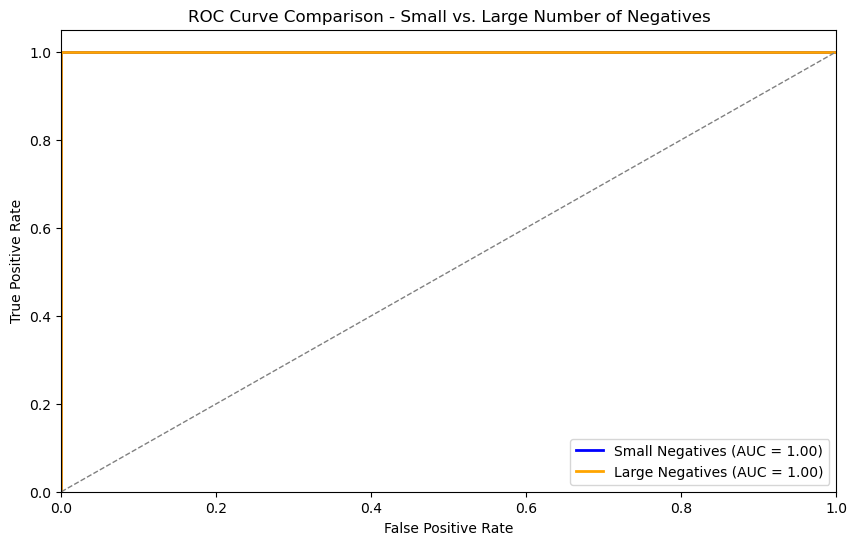

In [4]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Example 1: Small number of negatives
true_labels_1 = np.array([1]*10 + [0]*10)  # 10 positives, 10 negatives
pred_scores_1 = np.array([0.9, 0.8, 0.95, 0.7, 0.85, 0.92, 0.75, 0.88, 0.9, 0.7,
                          0.2, 0.3, 0.1, 0.4, 0.5, 0.2, 0.1, 0.25, 0.35, 0.1])


fpr_1, tpr_1, _ = roc_curve(true_labels_1, pred_scores_1)
roc_auc_1 = auc(fpr_1, tpr_1)

# Example 2: Larger number of negatives
true_labels_2 = np.array([1]*10 + [0]*100)  # 10 positives, 100 negatives
pred_scores_2 = np.array([0.9, 0.8, 0.95, 0.7, 0.85, 0.92, 0.75, 0.88, 0.9, 0.7] +
                         [0.2, 0.3, 0.1, 0.4, 0.5, 0.2, 0.1, 0.25, 0.35, 0.1] * 10)



fpr_2, tpr_2, _ = roc_curve(true_labels_2, pred_scores_2)
roc_auc_2 = auc(fpr_2, tpr_2)

# Plotting the ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_1, tpr_1, color='blue', lw=2, label=f'Small Negatives (AUC = {roc_auc_1:.2f})')
plt.plot(fpr_2, tpr_2, color='orange', lw=2, label=f'Large Negatives (AUC = {roc_auc_2:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)

# Adding labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison - Small vs. Large Number of Negatives')
plt.legend(loc="lower right")
plt.show()
